## [Myelodysplastic syndromes](https://pubmed.ncbi.nlm.nih.gov/27543316/)
For this problem set, you are tasked with analyzing exome sequencing data from 100 MDS patients.

The data are provided in *MDSExome.xlsx*

**Expectation**:
1. Carefully follow the description of the analysis to be performed. If you believe there are more than one ways to solve the problem, please pick one that is closest to the instruction.
2. Your answer will be graded based on correctness first, and adherence to the instruction second.
3. To give you some challenges, some parts of the code will be left blank. You are also not allowed to change any of the code provided.
4. You may send me a message + screen shot on Teams if you run into errors you cannot resolve. Each of you can do this **3 times** per programming problem set. So use your quota wisely.
5. For questions about concepts, please add you answer in the same comment cell as the question itself. For example,

## Example Q0: Explain the symptoms of MDS
Answer: blah blah

6. For questions about coding, add your code(s) in the code cell provided. Look for **FILL HERE** sign
7. If the coding question asks you to print something or plot something, always annotate your answer. For example,
  * Use **print('number of rows in the data:', data.shape[0])** rather than **print(data.shape[0])**
  * Add axis labels, title, and legend to the graph as appropriate

## Q1: Import packages that you need here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels

In the code below, data were loaded without specifying *index_col* because none of the columns can serve as unique index for the rows

## Q2: If we want to create a unique index for the data in each row, what would be some possible ideas?
Ans: There are 2 possible ways to establish a unique index. First, we can use the column index from the default, ordering from 0 to n, as the unique index. Second, we could create the new ID systems to describe the data in each row. For example, the new ID could indicate the patient ID, gene involvement, nuleotide position, and variant type.  

In [2]:
data = pd.read_excel('MDSExome.xlsx')
data.head()

,Patient ID,Ensembl ID,Gene Symbol,Ref Allele,Alt Allele,Predicted Impact,Nucleotide Position,Nucleotide Change,Amino Acid Position,Amino Acid Change,Genotype,Variant Type,VAF,Population AF
0,P267,ENSG00000120952,PRAMEF2,C,T,MODERATE,217.0,c.217C>T,73.0,p.Leu73Phe,hetero,missense_variant,0.5215,0.1336
1,P267,ENSG00000120952,PRAMEF2,T,C,MODERATE,1123.0,c.1123T>C,375.0,p.Cys375Arg,hetero,missense_variant,0.5927,0.4099
2,P267,ENSG00000120952,PRAMEF2,G,A,MODERATE,1124.0,c.1124G>A,375.0,p.Cys375Tyr,hetero,missense_variant,0.3866,0.2714
3,P267,ENSG00000120952,PRAMEF2,T,G,MODERATE,1330.0,c.1330T>G,444.0,p.Phe444Val,hetero,missense_variant,0.5667,0.1929
4,P267,ENSG00000120952,PRAMEF2,C,T,MODERATE,1391.0,c.1391C>T,464.0,p.Pro464Leu,hetero,missense_variant,0.1852,NaN


## Q3: First, let's examine the data
1. Print the size of this data (number of rows and columns)
2. Print the number of missing data for each columns

In [8]:
# Size of the data
print('The number of rows is', data.shape[0])
print('The number of columns is', data.shape[1])

The number of rows is 7459
The number of columns is 14


In [14]:
# The number of missing data in each column
data.isna().sum()

Patient ID                0
Ensembl ID                0
Gene Symbol               0
Ref Allele                0
Alt Allele                0
Predicted Impact          0
Nucleotide Position      88
Nucleotide Change         0
Amino Acid Position     123
Amino Acid Change        88
Genotype                  0
Variant Type              0
VAF                       0
Population AF          2939
dtype: int64

There are several missing values from the *Nucleotide Position*, *Amino Acid Position*, and *Amino Acid Change*. 
The code below extract these rows into a DataFrame **rows_with_missing**.
## Q4: What are the causes for these missing values?
Ans: There are 2 possible ways causing missing data. First, as some variants are rare, some information, such as nucleotide position, amino acid position and change, and population AF, could not be reported and collected in databases. Second, the problem is commonly found in bioinformatics databases. Since there are various types of biological data, establish a database to collect many types of data has been a challenge in this field. Therefore, the data that we collected from the databases could have some missing data.  

In [15]:
rows_with_missing = data.loc[pd.isna(data[['Nucleotide Position', 'Amino Acid Position', 'Amino Acid Change']]).any(axis = 1), :]
rows_with_missing.head(10)

,Patient ID,Ensembl ID,Gene Symbol,Ref Allele,Alt Allele,Predicted Impact,Nucleotide Position,Nucleotide Change,Amino Acid Position,Amino Acid Change,Genotype,Variant Type,VAF,Population AF
84,P281,ENSG00000120952,PRAMEF2,CC,TG,MODERATE,363.0,c.363_364delCCinsTG,NaN,p.AlaLeu121AlaVal,hetero,missense_variant,0.611111,NaN
125,P281,ENSG00000105639,JAK3,T,C,MODIFIER,NaN,c.-36A>G,NaN,NaN,hetero,5_prime_UTR_variant,0.453333,0.28150
146,P281,ENSG00000157764,BRAF,A,G,MODIFIER,NaN,c.*37T>C,NaN,NaN,hetero,3_prime_UTR_variant,0.469325,0.22160
164,P76,ENSG00000120952,PRAMEF2,CC,TG,MODERATE,363.0,c.363_364delCCinsTG,NaN,p.AlaLeu121AlaVal,hetero,missense_variant,0.452381,NaN
269,P65,ENSG00000105639,JAK3,T,C,MODIFIER,NaN,c.-36A>G,NaN,NaN,hetero,5_prime_UTR_variant,0.508772,0.28150
362,P242,ENSG00000120952,PRAMEF2,CC,TG,MODERATE,363.0,c.363_364delCCinsTG,NaN,p.AlaLeu121AlaVal,hetero,missense_variant,0.263158,NaN
555,P02,ENSG00000157764,BRAF,A,G,MODIFIER,NaN,c.*37T>C,NaN,NaN,homo,3_prime_UTR_variant,0.994200,0.22160
661,P194,ENSG00000169032,MAP2K1,A,G,MODIFIER,NaN,c.-2A>G,NaN,NaN,hetero,5_prime_UTR_variant,0.472028,0.01318
679,P194,ENSG00000105639,JAK3,T,C,MODIFIER,NaN,c.-36A>G,NaN,NaN,hetero,5_prime_UTR_variant,0.471074,0.28150
713,P155,ENSG00000120952,PRAMEF2,CC,TG,MODERATE,363.0,c.363_364delCCinsTG,NaN,p.AlaLeu121AlaVal,hetero,missense_variant,0.296296,NaN


For Population AF (allele frequency in human population, estimated from 1,000 genome project), the missing values are because some mutations identified here are not well-documented in public human mutation database.

One possibility is that these mutations are rare. We can test this idea in various ways. For example, we can use VAF (variant allele frequency) identified in these 100 patients as a proxy for how rare the mutations are.
## Q5: Visualize the distribution of VAF between rows with Population AF and rows without
1. Use seaborn's **violinplot**. We first create a new data column that contain **True/False** to indicate whether *Population AF* is present to aid the plotting
2. Use matplotlib's **hist** and overlay the two histograms onto the same plot. Set *density* parameter to show the density, not the count.

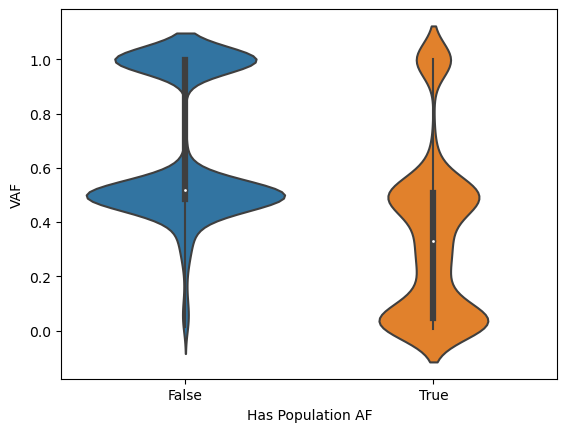

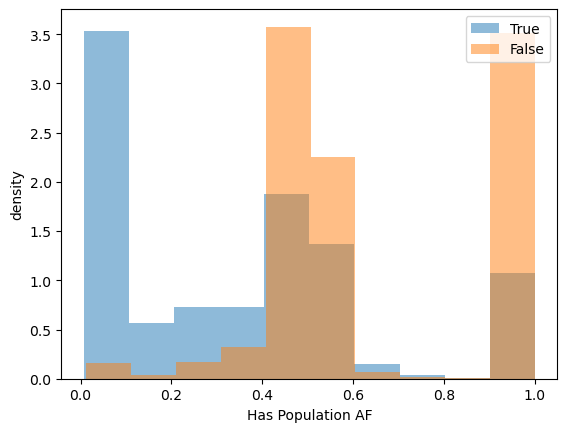

In [43]:
data['Has Population AF'] = data['Population AF'].isna()

## Violin plot
_ = sns.violinplot(data = data, x = 'Has Population AF', y = 'VAF')
plt.show()

## Histogram
plt.hist(data['VAF'].loc[data['Has Population AF']], facecolor = 'tab:blue', alpha = 0.5, label = 'True', density = True)
plt.hist(data['VAF'].loc[~data['Has Population AF']], facecolor = 'tab:orange', alpha = 0.5, label = 'False', density = True)

plt.xlabel('Has Population AF')
plt.ylabel('density')

plt.legend()
plt.show()

## Q6: Use an appropriate non-parametric test to determine whether VAF of mutations with Population AF are significantly higher than VAF of mutations without Population AF
1. Print the test statistics and p-value
2. What is your conclusion from Q5 and Q6 about the hypothesis that mutations without *Population AF* are rare mutations?

Ans: Because Mann-Whitney U test provided the significant level, It can be concluded that mutations without recorded population AF are rarer than mutations having the record.

In [44]:
PAF_true = data.loc[data['Has Population AF'], 'VAF']
PAF_false = data.loc[~data['Has Population AF'], 'VAF']

print('True vs False')
# print(scipy.stats.ttest_ind(PAF_true, PAF_false, equal_var = False, alternative = 'two-sided'))
print(scipy.stats.mannwhitneyu(PAF_true, PAF_false, alternative = 'two-sided'))

True vs False
MannwhitneyuResult(statistic=2956222.5, pvalue=0.0)


To use t-test, we should first test whether the VAF data are normally distributed.

## Q7: Test whether VAF data is normally distributed
1. Print the test statistics and p-value from **normaltest**
2. Plot a histogram of the VAF values
3. What is your conclusion? Does the histogram agrees with the normaltest result?

Ans: Due to the significant p-value, the VAF data is not normally distributed. However, the histogram of the data show some outliers leading to the abnormal distribution. Therefore, removing the outliers could convert the data to normal distribution.  

In [62]:
print(scipy.stats.normaltest(data['VAF']))

NormaltestResult(statistic=825.1318237805918, pvalue=6.681916506912053e-180)


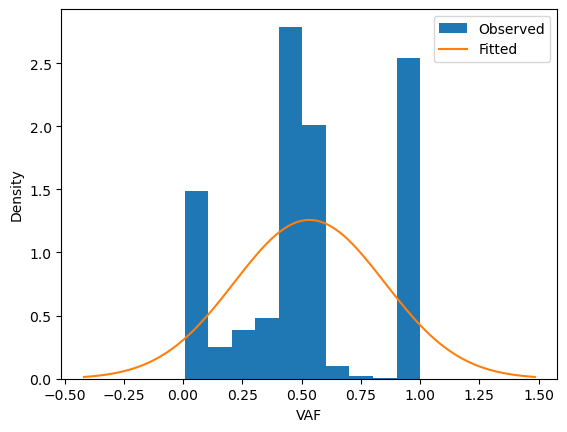

In [61]:
## Histogram

mean, std = scipy.stats.norm.fit(data['VAF'])

plt.figure()
plt.hist(data['VAF'], bins = 10, density = True, label = 'Observed')

x = np.linspace(mean - 3 * std, mean +  3 * std, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std), label = 'Fitted')

plt.xlabel('VAF'); plt.ylabel('Density'); plt.legend()
plt.show()

Next, let's identified frequently mutated genes in these patients because they might be related to MDS

## Q8: Show the mutation frequency for each gene in this dataset
1. Use **value_counts**
2. What are the top 3 mutated genes?

Ans: KMT2C, PRAMEF2, and ANKRD26

3. Are they known to be involved in MDS? Provide some literature evidence

Ans: From Park's study (2021), he found that ANKRD26 mutation can result in childhood MDS. Sperling et al. (2017) revealed that KMT2C mutation played an important role in aplastic anemia progression. In addition, the study conducted by Kern at el. (2017) showed that PRAMEF2 mutation analysed from NGS data had an association with MDS.  

In [64]:
data['Gene Symbol'].value_counts()

KMT2C      778
PRAMEF2    660
ANKRD26    384
BRCA1      284
BRCA2      258
          ... 
IKZF1        1
IDH1         1
UTP23        1
MYC          1
U2AF2        1
Name: Gene Symbol, Length: 140, dtype: int64

## Q9 Use pie chart to show the frequency of the following columns
1. Predicted Impact
2. Variant Type

**Hint**: You can use the output from **value_counts** as input for **pie** plot

In [69]:
prop_impact = data['Predicted Impact'].value_counts()
print(prop_impact)

MODERATE    6782
HIGH         589
MODIFIER      84
LOW            4
Name: Predicted Impact, dtype: int64


In [67]:
prop_variant = data['Variant Type'].value_counts()
print(prop_variant)

missense_variant                                  6671
frameshift_variant                                 337
stop_gained                                        147
disruptive_inframe_deletion                        111
frameshift_variant&stop_gained                     105
3_prime_UTR_variant                                 44
5_prime_UTR_variant                                 40
5_prime_UTR_premature_start_codon_gain_variant       4
Name: Variant Type, dtype: int64


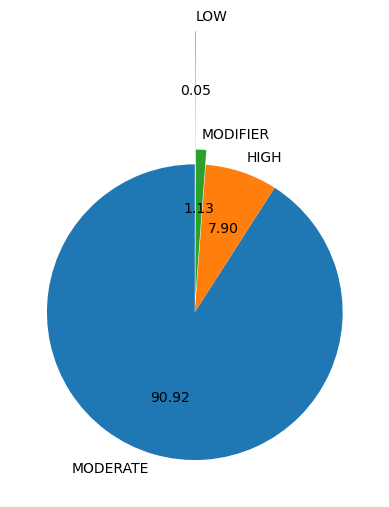

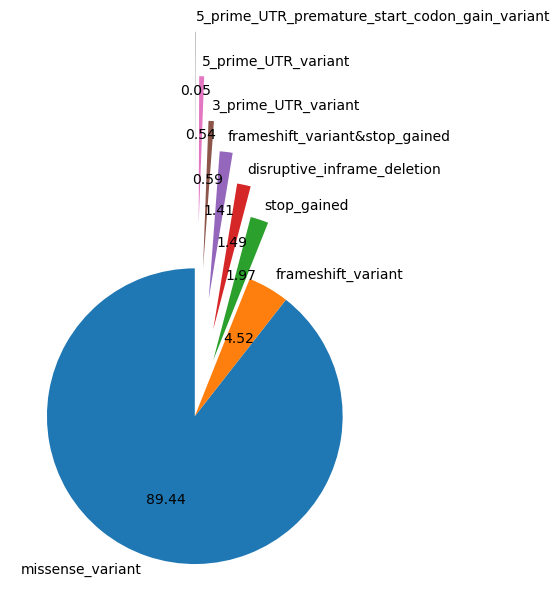

In [101]:
## First pie chart
explode1 = (0, 0, 0.1, 0.9)
plt.pie(prop_impact.values, labels = prop_impact.index, startangle = 90, autopct = '%.2f', explode = explode1)
plt.show()

## Second pie chart
explode2 = (0, 0, 0.4, 0.6, 0.8, 1, 1.3, 1.6)
plt.pie(prop_variant.values, labels = prop_variant.index, startangle = 90, autopct = '%.2f', explode = explode2)
plt.show()

Let's explore whether VAF is correlated with Population AF
## Q10: Visualize relationship between VAF and Population AF
Use seaborn's **lmplot**

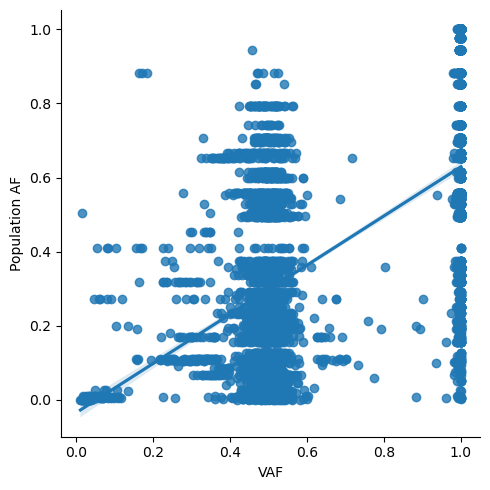

In [103]:
_ = sns.lmplot(data = data, x = 'VAF', y = 'Population AF')

## Q11: Calculate Pearson's and Spearman's correlation between VAF and Population AF
**Note**: Be careful that some functions do not allow missing values

In [104]:
# Filter out missing data
nomissing_data = data.loc[~pd.isna(data['VAF']) & ~pd.isna(data['Population AF']), :]
nomissing_data.head()

,Patient ID,Ensembl ID,Gene Symbol,Ref Allele,Alt Allele,Predicted Impact,Nucleotide Position,Nucleotide Change,Amino Acid Position,Amino Acid Change,Genotype,Variant Type,VAF,Population AF,Has Population AF
0,P267,ENSG00000120952,PRAMEF2,C,T,MODERATE,217.0,c.217C>T,73.0,p.Leu73Phe,hetero,missense_variant,0.5215,0.1336,False
1,P267,ENSG00000120952,PRAMEF2,T,C,MODERATE,1123.0,c.1123T>C,375.0,p.Cys375Arg,hetero,missense_variant,0.5927,0.4099,False
2,P267,ENSG00000120952,PRAMEF2,G,A,MODERATE,1124.0,c.1124G>A,375.0,p.Cys375Tyr,hetero,missense_variant,0.3866,0.2714,False
3,P267,ENSG00000120952,PRAMEF2,T,G,MODERATE,1330.0,c.1330T>G,444.0,p.Phe444Val,hetero,missense_variant,0.5667,0.1929,False
5,P267,ENSG00000107890,ANKRD26,A,T,MODERATE,4590.0,c.4590T>A,1530.0,p.Phe1530Leu,hetero,missense_variant,0.2255,0.3173,False


In [105]:
# Calculate Pearson and Spearman correlation
print('Pearson:', scipy.stats.pearsonr(nomissing_data['VAF'], nomissing_data['Population AF']))
print('Spearman:', scipy.stats.spearmanr(nomissing_data['VAF'], nomissing_data['Population AF']))

Pearson: PearsonRResult(statistic=0.5753157433954312, pvalue=0.0)
Spearman: SpearmanrResult(correlation=0.4817003275474158, pvalue=2.384353833066469e-261)


We can guess that Variant Type likely contributed to the HIGH, MODERATE, LOW, and MODIFIER predicted impact. But, let's check the data to be sure
## Q12: Generate a table summarizing the relationship between Variant Type and Predicted Impact
1. Use **crosstab**
2. What do you find?

Ans: Mutations with high predicted impact mostly come from framshift and nonsense types while moderate impact is mainly involved in missense mutation. Another interesting is that there is a few of low predicted impact results casused by 5' UTR premature start gain variant. Moreover, Predicted modifier impact primarily results from both 3' and 5' UTR variants.   

In [106]:
pd.crosstab(index = data['Variant Type'], columns = data['Predicted Impact'])

Predicted Impact,HIGH,LOW,MODERATE,MODIFIER
Variant Type,,,,
3_prime_UTR_variant,0,0,0,44
5_prime_UTR_premature_start_codon_gain_variant,0,4,0,0
5_prime_UTR_variant,0,0,0,40
disruptive_inframe_deletion,0,0,111,0
frameshift_variant,337,0,0,0
frameshift_variant&stop_gained,105,0,0,0
missense_variant,0,0,6671,0
stop_gained,147,0,0,0


Finally, we want to summarize the mutation profile for each patient
## Q13: Generate a table summarizing the number of mutation for each patient
Below is a code template that can do this in a roundabout way. Fill in the missing parts

In [130]:
all_patients = pd.unique(data['Patient ID'])
mutation_count1 = pd.DataFrame(0, index = all_patients, columns = ['Number of Mutations'])

for patient in all_patients:
    mutation_count1.loc[patient, 'Number of Mutations'] = data['Patient ID'].value_counts()[patient]

mutation_count1 = mutation_count1.sort_values('Number of Mutations', ascending = False)
mutation_count1.head()

,Number of Mutations
P198,158
P194,140
P306,108
P183,107
P252,104


## Q14: Repeat Q13 with a one-line code

In [136]:
mutation_count2 = pd.DataFrame(list(data['Patient ID'].value_counts()[all_patients]), index = all_patients, columns = ['Number of Mutations'])
mutation_count2 = mutation_count2.sort_values('Number of Mutations', ascending = False)
mutation_count2.head()

,Number of Mutations
P198,158
P194,140
P306,108
P183,107
P252,104


## Q15: Generate a table summarizing the frequency of each Variant Type for each patient
Use **crosstab**

In [107]:
pd.crosstab(index = data['Patient ID'], columns = data['Variant Type'])

Variant Type,3_prime_UTR_variant,5_prime_UTR_premature_start_codon_gain_variant,5_prime_UTR_variant,disruptive_inframe_deletion,frameshift_variant,frameshift_variant&stop_gained,missense_variant,stop_gained
Patient ID,,,,,,,,
P01,0,0,0,0,7,1,60,3
P02,1,0,0,0,9,1,74,1
P112,0,0,1,1,1,1,54,0
P114,0,0,1,1,1,1,72,2
P116,0,0,1,1,0,1,58,1
...,...,...,...,...,...,...,...,...
P86,0,0,0,1,1,1,60,0
P91,1,0,0,2,0,1,49,0
P92,0,1,0,1,2,1,67,1


Because the table is too large being difficult to interpret, visualization of the table using a heatmap is the appropriate way in this case. 

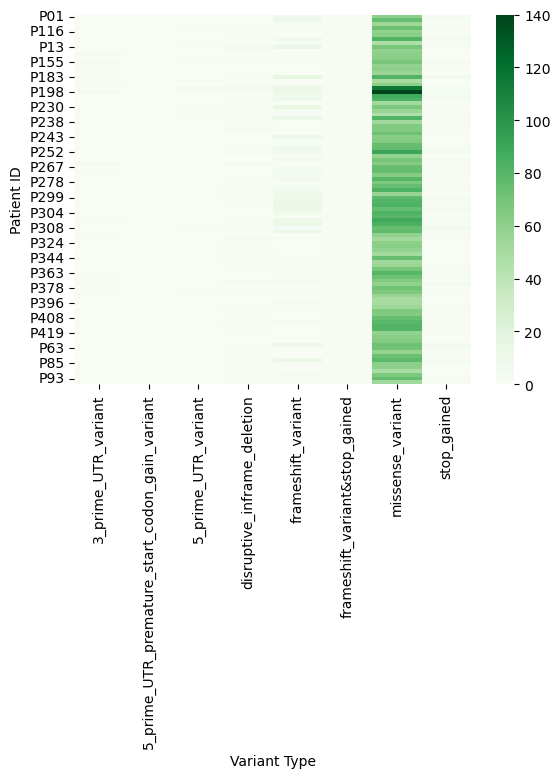

In [112]:
#plt.figure(figsize = (4, 5))
sns.heatmap(pd.crosstab(index = data['Patient ID'], columns = data['Variant Type']),
            cmap = plt.cm.Greens, annot = False)
plt.yticks(rotation = 0)
plt.show()

## Bonus question: 
Come up with a visualization, a table, or a statistical test that says something interesting about this dataset or MDS.


I would like to identify an association between Genotype and high impact mutation then I constructed the 2X2 contingency table as shown below. After that, I calculated Fisher exact test to measure p-value. The result revealed the significant association between row and column of the table (p-value < 0.05). 

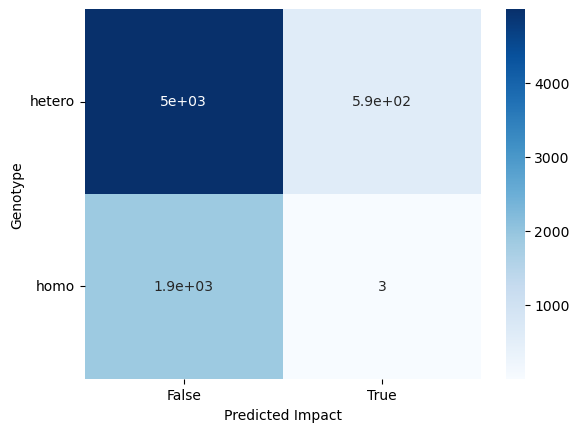

In [167]:
#Identify frequency between genotype and high impact
high_vs_genotype = pd.crosstab(index = data['Genotype'], columns = data['Predicted Impact'] == 'HIGH')
sns.heatmap(high_vs_genotype, cmap = plt.cm.Blues, annot = True)
plt.yticks(rotation = 0)
plt.show()

In [170]:
# Perform Fisher exact test to measure the significance level of proportion of heterozygous in high impact mutation
odd_ratio, p_value = scipy.stats.fisher_exact(high_vs_genotype)
print('two-tailed Fisher\'s exact:')
print('odd ratio is :', odd_ratio)
print('p-value is :', p_value)

two-tailed Fisher's exact:
odd ratio is : 0.013628226493083097
p-value is : 4.1032698900068195e-72
